### Testing FB Prophet as shown in their quickstart guide:
https://facebook.github.io/prophet/docs/quick_start.html#python-apihttps://facebook.github.io/prophet/docs/quick_start.html#python-api

https://towardsdatascience.com/forecasting-stock-prices-using-prophet-652b31fb564e

In [1]:
from fbprophet import Prophet
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

Importing plotly failed. Interactive plots will not work.


In [2]:
ticker = yf.Ticker('AAPL')
df = ticker.history(start="2000-07-30", end="2020-07-30").reset_index()

In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
5026,2020-07-23,387.99,388.31,368.04,371.38,49251100,0.0,0.0
5027,2020-07-24,363.95,371.88,356.58,370.46,46359700,0.0,0.0
5028,2020-07-27,374.84,379.62,373.92,379.24,30303500,0.0,0.0
5029,2020-07-28,377.47,378.20,372.99,373.01,25906400,0.0,0.0
5030,2020-07-29,375.00,380.92,374.85,380.16,22582300,0.0,0.0


In [4]:
df.rename(columns={'Date': 'ds','Close':'y'},inplace = True)

In [5]:
df_new = df[['ds','y']]
df_new.tail()

,ds,y
5026,2020-07-23,371.38
5027,2020-07-24,370.46
5028,2020-07-27,379.24
5029,2020-07-28,373.01
5030,2020-07-29,380.16


In [7]:
m = Prophet(daily_seasonality = True)
m.fit(df_new)

In [8]:
future = m.make_future_dataframe(periods=365)

#Remove weekends
future['day'] = future['ds'].dt.weekday
future = future[future['day']<=4]

In [9]:
future.tail()

,ds,day
5389,2021-07-23,4
5392,2021-07-26,0
5393,2021-07-27,1
5394,2021-07-28,2
5395,2021-07-29,3


In [10]:
forecast = m.predict(future)

In [11]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
5287,2021-07-23,341.253351,321.021574,361.675582
5288,2021-07-26,341.184380,321.328631,360.020799
5289,2021-07-27,341.260564,322.066786,360.122214
5290,2021-07-28,341.165833,322.195476,361.876941
5291,2021-07-29,340.964875,321.798397,360.989888


C:\Users\charl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


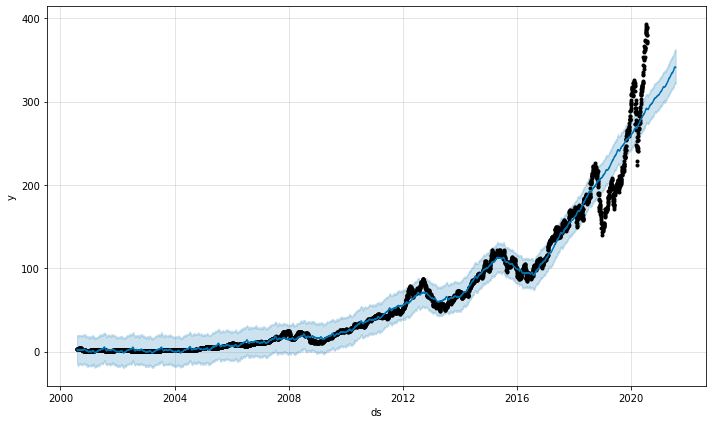

In [12]:
fig1 = m.plot(forecast)
axes = plt.axes()
#axes.set_xlim(datetime.datetime(2015, 1, 1),datetime.datetime(2021, 7, 20))

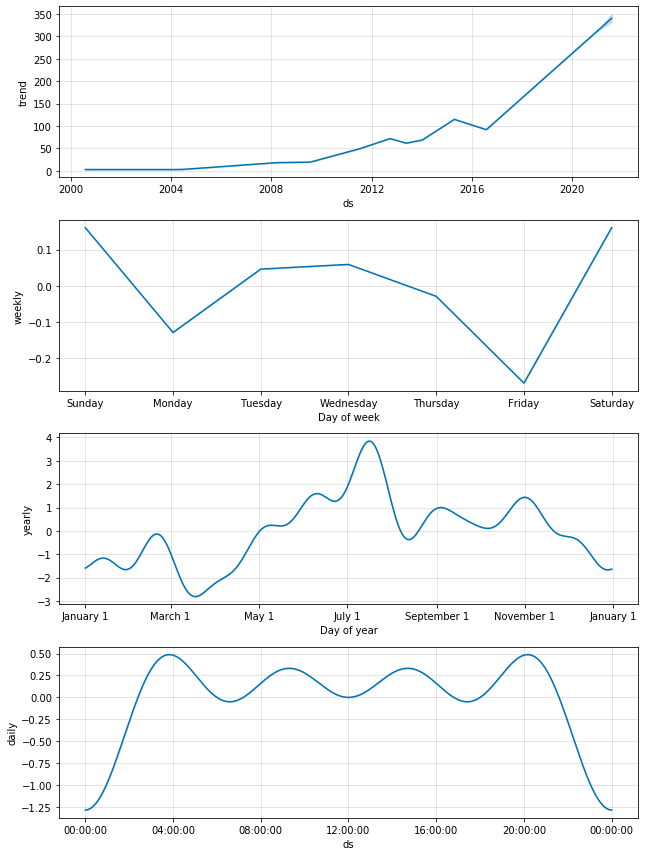

In [13]:
fig2 = m.plot_components(forecast)

### Now that we have applied the basics of prophet, let's try to apply some time series cross validation to tune the model

https://www.kaggle.com/manovirat/timeseries-using-prophet-hyperparameter-tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV


model = Prophet(daily_seasonality = True)
param_search = {'max_depth' : [3, 5]}

tscv = TimeSeriesSplit(n_splits=3)
gsearch = GridSearchCV(estimator=model, cv=tscv,
                        param_grid=param_search)
gsearch.fit(df_new)